# Serial numder extraction from bank notes

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from PIL import Image
import PIL.Image
import re
from pytesseract import image_to_string
import pytesseract

In [2]:
# Install pytesseract from web
# Loading the pytesseract from the local directory
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

## Time taken to extract serial number from single bank note   ( < 1s )

In [49]:
%%time
img = cv2.imread('D:\\Data science\\Serial number detection\\pics\\ck-tmp-ocr-img-XZ7vA3-20191016082411537.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_th = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
# make a check to see if median blurring should be done to remove noise
gray_blur = cv2.medianBlur(gray_th, 1)
text = pytesseract.image_to_string(gray_blur, lang='eng')
# print(text)

m = re.findall(r"(\b[A-Z]{2}\b|\d{6,7})", text)
if m:
    print(' '.join(m))

BH 3026233
Wall time: 475 ms


In [50]:
# Method 2 for pattern extraction
m2 = list(filter(lambda x:len(x) , re.findall(r'(\b[A-Z]{2}\b|\d{6,7})', text)))
print(' '.join(m2))

BH 3026233


### Extracting serial numbers from all images

In [7]:
# Using 'Image / PIL' library method
from PIL import ImageFilter
from PIL import ImageEnhance

In [9]:
%%time
cv_img = []
for img in glob.glob("D:\\Data science\\Serial number detection\\pics\\*.jpg"):
    n= Image.open(img).convert(mode='L').resize((1280, 720), Image.ANTIALIAS)
    n= n.filter(ImageFilter.SHARPEN)
    enhancer = ImageEnhance.Sharpness(n)
    n1 = enhancer.enhance(0.5)
    # Resize the image.
    print('Resizing %s...' % (n1))
    cv_img.append(n1)
    print('Number of files found', len(cv_img))

Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856A1F98>...
Number of files found 1
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230812121D0>...
Number of files found 2
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856A1FD0>...
Number of files found 3
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x23081201FD0>...
Number of files found 4
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856ACE80>...
Number of files found 5
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856AC278>...
Number of files found 6
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856ACF60>...
Number of files found 7
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856A1F28>...
Number of files found 8
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856ACC18>...
Number of files found 9
Resizing <PIL.Image.Image image mode=L size=1280x720 at 0x230856AC8D0>...
Number of files found 10
Resizing <PIL.Image

In [10]:
len(cv_img)

94

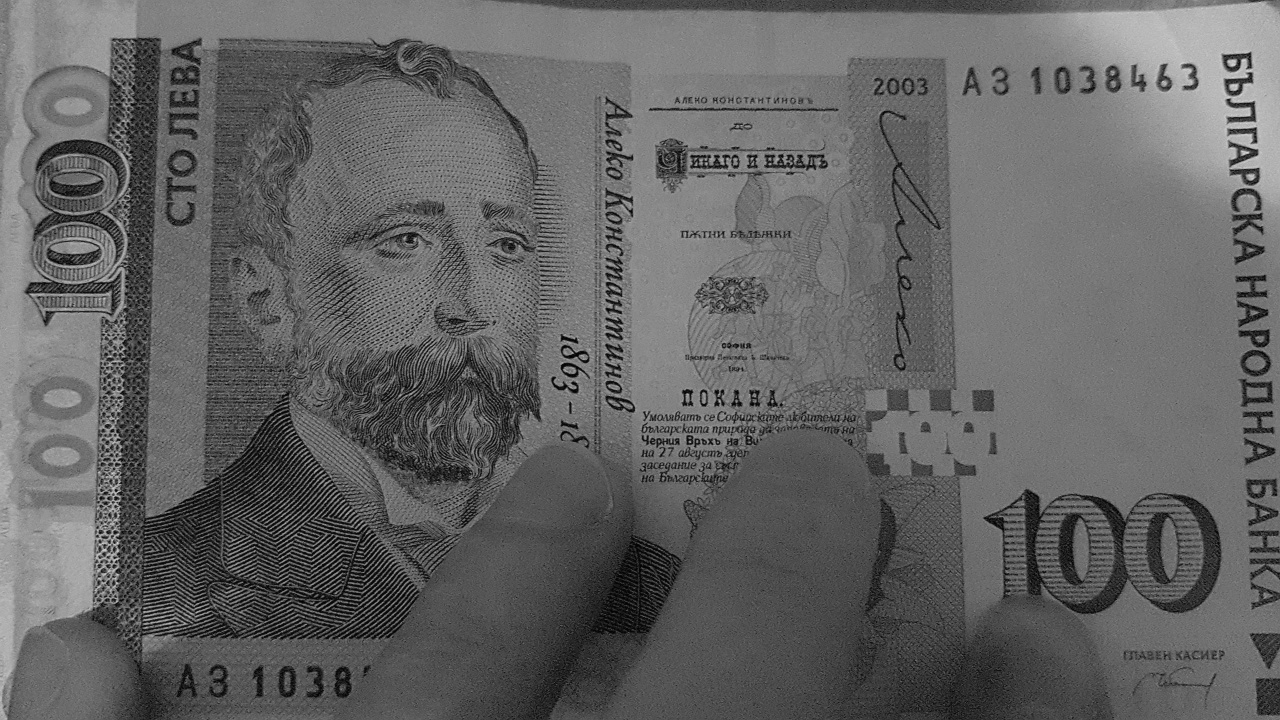

In [12]:
cv_img[65]

### Using 'Open CV' library

In [72]:
%%time
from os import listdir,makedirs
from os.path import isfile,join

path = r'D:\\Data science\\Serial number detection\\pics' # Source Folder
dstpath = r'D:\\Data science\\Serial number detection\\pics2' # Destination Folder

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

cv_imgs=[]

for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
      # img_resize= 
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # gray = cv2.bitwise_not(gray)
        gray_thr = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        # make a check to see if median blurring should be done to remove
        # noise
        # img_flip = cv2.flip( gray_thr, -1 )
        gray_blur = cv2.medianBlur(gray_thr, 1)
        cv_imgs.append(gray_blur)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray_blur)
    except:
        print ("{} is not converted".format(image))

Directory already exist, images will be written in same folder
Wall time: 9.09 s


In [73]:
text1 = pytesseract.image_to_string(cv_imgs[10], lang='eng')
m3 = list(filter(lambda x:len(x) , re.findall(r'(\b[A-Z]{2}\b|\d{6,7})', text1)))
print(' '.join(m3))

6599914


In [25]:
# Extracting text from all images
%%time
cv_img = []
def main(): 
    # path for the folder for getting the raw images 
    path ="D:\\Data science\\Serial number detection\\pics"
  
    # link to the file in which output needs to be kept 
    fullTempPath ="D:\\Data science\\Serial number detection\\outputFile1.txt"
  
    # iterating the images inside the folder 
    for imageName in os.listdir(path): 
        inputPath = os.path.join(path, imageName) 
        img = Image.open(inputPath).convert("L").resize((1280, 720), Image.ANTIALIAS)
        n= img.filter(ImageFilter.SHARPEN)
        enhancer = ImageEnhance.Sharpness(n)
        n1 = enhancer.enhance(0.5)
        cv_img.append(n1)

        # applying ocr using pytesseract for python 
        text = pytesseract.image_to_string(n1, lang ="eng")

        # saving the  text for appending it to the output.txt file 
        # a + parameter used for creating the file if not present 
        # and if present then append the text content 
        file1 = open(fullTempPath, "a") 
        # providing the name of the image 
        file1.write(imageName+"\n") 
        # providing the content in the image 
        file1.write(text+"\n\n\n")       # replace 'm' with text
        file1.close()  
  
    # for printing the output file 
    file2 = open(fullTempPath, 'r') 
    print(file2.read()) 
    print('Number of files found', len(file2))
    file2.close()   
    
if __name__ == '__main__': 
    main() 

ck-tmp-ocr-img-XZ7vA3-20191016082342027.jpg
BbJITAPCKA HAPODLHA BAHKA > <4
Qo ni

    

 

e BY 175715

 

 

  

0 SEE SHOP THR RAHOHEREY


ck-tmp-ocr-img-XZ7vA3-20191016082411537.jpg
a
=
;
5
5
°
=|
a
>
>
ce
5


ck-tmp-ocr-img-XZ7vA3-20191016082446760.jpg
iu
g
i
mw
DO
at
ae
a
Cc


ck-tmp-ocr-img-XZ7vA3-20191016082528583.jpg
BbJITAPCKA HAPODLHA BAHKA > 4

0

BY 775715

See SS
Pee

ASS

==

a Caabeiikob

1866-1912


ck-tmp-ocr-img-XZ7vA3-20191016082549965.jpg
BbJITAPCKA HAPODIHA BAHKA >


ck-tmp-ocr-img-XZ7vA3-20191016082607249.jpg
BH 3026233

 

 

 

 

 

 

 

 

 

 

 

 

 

g
z
a
5
g
:
g
:
v
A


ck-tmp-ocr-img-XZ7vA3-20191016082635841.jpg
BbJITAPCKA HAPODIHA BAHKA > <4

BH 3026233


ck-tmp-ocr-img-XZ7vA3-20191130092502883.jpg
BbJITAPCKA HAPOLIHA BAHKA Bl @ ©

        

 

BO 9608709

Tlempp Bepon

weet ete eee

1799 ~ 1871

“Ee


ck-tmp-ocr-img-XZ7vA3-20191130124832052.jpg
oI
a
=
>
mo)
eee
S
ig]
°
Ho
ee
>
gl
>
z
a
@

ynAsrEn
4

fo]

oOo 5

= ig |
=O
o~
So
Lo $


ck-tmp-ocr-img-X

TypeError: object of type '_io.TextIOWrapper' has no len()

In [95]:
# Extracting possible serial numbers from all images.
%%time
cv_img = []
def main(): 
    # path for the folder for getting the raw images 
    path ="D:\\Data science\\Serial number detection\\pics"
    
    # link to the file in which output needs to be kept 
    # fullTempPath ="D:\\Data science\\Serial number detection\\outputFile1.txt"
  
    # Iterating the images inside the folder 
    for imageName in os.listdir(path): 
        inputPath = os.path.join(path, imageName) 
        img = Image.open(inputPath).convert("L").resize((1280, 720), Image.ANTIALIAS)
        n= img.filter(ImageFilter.SHARPEN)
        enhancer = ImageEnhance.Sharpness(n)
        n1 = enhancer.enhance(0.5)
        cv_img.append(n1)

        # applying ocr using pytesseract for python 
        text = pytesseract.image_to_string(n1, lang ="bul")
        for s in re.findall(r"(\b[A-Я]{2}\b|\d{6,7})",text):
            print(imageName,'    Seial number:', "".join(s))
    
if __name__ == '__main__': 
    main() 

ck-tmp-ocr-img-XZ7vA3-20191016082342027.jpg     Seial number: БУ
ck-tmp-ocr-img-XZ7vA3-20191016082342027.jpg     Seial number: 7757415
ck-tmp-ocr-img-XZ7vA3-20191016082446760.jpg     Seial number: ЕЕ
ck-tmp-ocr-img-XZ7vA3-20191016082528583.jpg     Seial number: БУ
ck-tmp-ocr-img-XZ7vA3-20191016082528583.jpg     Seial number: 7757115
ck-tmp-ocr-img-XZ7vA3-20191016082528583.jpg     Seial number: РА
ck-tmp-ocr-img-XZ7vA3-20191016082607249.jpg     Seial number: БН
ck-tmp-ocr-img-XZ7vA3-20191016082607249.jpg     Seial number: 3026233
ck-tmp-ocr-img-XZ7vA3-20191016082635841.jpg     Seial number: БН
ck-tmp-ocr-img-XZ7vA3-20191016082635841.jpg     Seial number: 3026233
ck-tmp-ocr-img-XZ7vA3-20191130092502883.jpg     Seial number: ШФ
ck-tmp-ocr-img-XZ7vA3-20191130092502883.jpg     Seial number: БО
ck-tmp-ocr-img-XZ7vA3-20191130092502883.jpg     Seial number: 9608709
ck-tmp-ocr-img-XZ7vA3-20191130124832052.jpg     Seial number: ЕЕ
ck-tmp-ocr-img-XZ7vA3-20191130124832052.jpg     Seial number: ЕЕ
